In [2]:
# Start of question
# Preprocessing and data analysis:
# Examine the data for missing values. In case of categorical attributes, remove instances with missing values.
# In the case of numeric attributes, impute and fill-in the missing values using the attribute mean.
# Examine the characteristics of the attributes, including relevant statistics for each attribute, histograms illustrating
# the distribtions of numeric attributes, bar graphs showing value counts for categorical attributes, etc.
# Perform the following cross-tabulations (including generating bar charts): education+race, work-class+income,
# work-class+race, and race+income. In the latter case (race+income) also create a table or chart showing percentages
# of each race category that fall in the low-income group. Discuss your observations from this analysis.
# Compare and contrast the characteristics of the low-income and high-income categories across the different attributes.

# Predictive Modeling and Model Evaluation:
# Using either Pandas or Scikit-learn, create dummy variables for the categorical attributes. Then separate the target
# attribute ("income_>50K") from the attributes used for training. [Note: you need to drop "income_<=50K" which is also
# created as a dummy variable in earlier steps).
# Use scikit-learn to build classifiers uisng Naive Bayes (Gaussian), decision tree (using "entropy" as selection criteria),
# and linear discriminant analysis (LDA). For each of these perform 10-fold cross-validation (using cross-validation
# module in scikit-learn) and report the overall average accuracy.
# [Extra Credit] For the decision tree model (generated on the full training data), generate a visualization of tree and
# submit it as a separate file (png, jpg, or pdf).

In [3]:
cd csc478

C:\Users\Shawn\csc478


In [4]:
import numpy as np
from numpy import *
import pandas as pd
import matplotlib.pyplot as plt
 
adultData = np.genfromtxt("adult-modified.csv", delimiter=",",names = True,dtype=(int, "|S10", int, "|S10", "|S5","|S5",int,"|S10"))
m = adultData["age"].mean()
adultData = adultData[adultData["workclass"] != "?"]
for i in range(len(adultData["age"])):
    if adultData["age"][i] == -1:
        adultData["age"][i] = m
np.savetxt("modifed_data.csv", adultData, delimiter=",",header="age,workclass,education,marital-status,race,sex,hours-per-week,income", fmt="%s")
adultData = pd.read_csv("modifed_data.csv")

In [5]:
adultData.dtypes

# age              int64
workclass         object
education          int64
marital-status    object
race              object
sex               object
hours-per-week     int64
income            object
dtype: object

In [6]:
adultData.describe(include="all")

,# age,workclass,education,marital-status,race,sex,hours-per-week,income
count,9412.000000,9412,9412.000000,9412,9412,9412,9412.000000,9412
unique,NaN,3,NaN,2,5,2,NaN,2
top,NaN,Private,NaN,Married,White,Male,NaN,<=50K
freq,NaN,6947,NaN,4737,8062,6383,NaN,7093
mean,38.337229,NaN,10.125266,NaN,NaN,NaN,41.080217,NaN
std,12.963447,NaN,2.542118,NaN,NaN,NaN,11.884590,NaN
min,17.000000,NaN,1.000000,NaN,NaN,NaN,1.000000,NaN
25%,28.000000,NaN,9.000000,NaN,NaN,NaN,40.000000,NaN
50%,37.000000,NaN,10.000000,NaN,NaN,NaN,40.000000,NaN
75%,47.000000,NaN,13.000000,NaN,NaN,NaN,45.000000,NaN


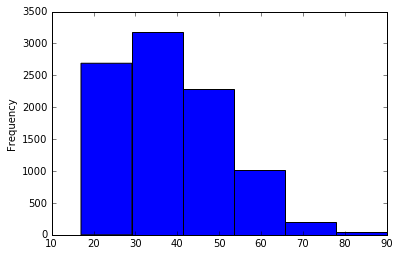

In [7]:
%matplotlib inline
adultData["# age"].plot(kind="hist", bins=6)

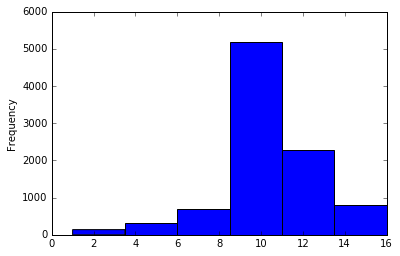

In [8]:
adultData["education"].plot(kind="hist", bins=6)

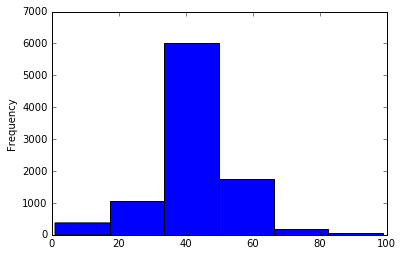

In [9]:
adultData["hours-per-week"].plot(kind="hist", bins=6)

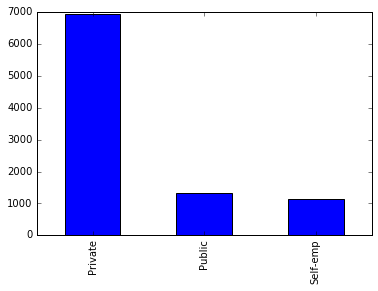

In [10]:
adultData["workclass"].value_counts().plot(kind='bar')

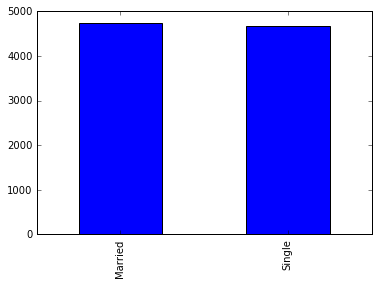

In [11]:
adultData["marital-status"].value_counts().plot(kind='bar')

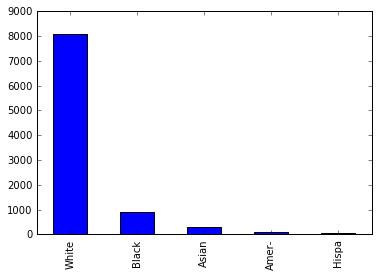

In [12]:
adultData["race"].value_counts().plot(kind='bar')

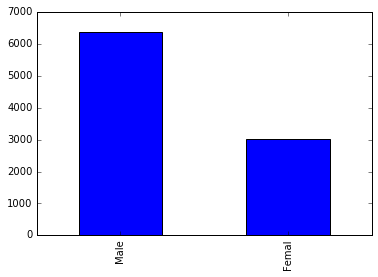

In [13]:
adultData["sex"].value_counts().plot(kind='bar')

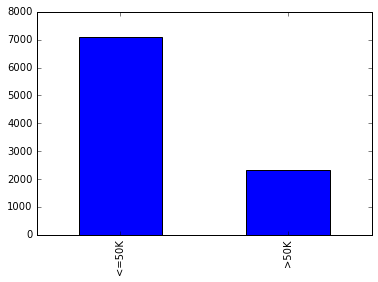

In [14]:
adultData["income"].value_counts().plot(kind='bar')

In [15]:
gg1 = pd.crosstab(adultData["race"], adultData["income"])
gg1

income,<=50K,>50K
race,,
Amer-,83,9
Asian,224,67
Black,773,119
Hispa,69,6
White,5944,2118


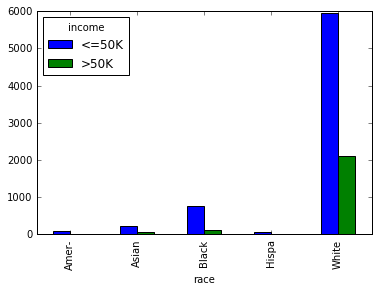

In [16]:
plt.show(gg1.plot(kind="bar"))

In [17]:
gg2 = pd.crosstab(adultData["workclass"], adultData["income"])
gg2

income,<=50K,>50K
workclass,,
Private,5443,1504
Public,925,392
Self-emp,725,423


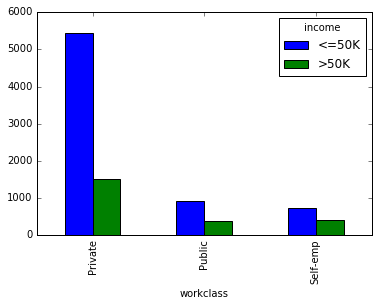

In [18]:
plt.show(gg2.plot(kind="bar"))

In [19]:
gg3 = pd.crosstab(adultData["workclass"], adultData["race"])
gg3

race,Amer-,Asian,Black,Hispa,White
workclass,,,,,
Private,65,204,664,64,5950
Public,20,48,192,5,1052
Self-emp,7,39,36,6,1060


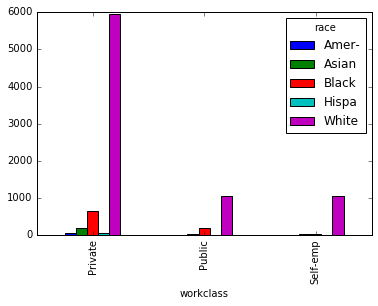

In [20]:
plt.show(gg3.plot(kind="bar"))

In [21]:
gg4 = pd.crosstab( adultData["race"],adultData["income"])
gg4

income,<=50K,>50K
race,,
Amer-,83,9
Asian,224,67
Black,773,119
Hispa,69,6
White,5944,2118


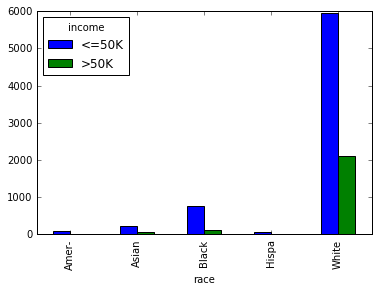

In [22]:
plt.show(gg4.plot(kind="bar"))

In [23]:
gg4["lower"] = gg4["<=50K"]/(gg4["<=50K"]+gg4[">50K"])
gg4

income,<=50K,>50K,lower
race,,,
Amer-,83,9,0.902174
Asian,224,67,0.769759
Black,773,119,0.866592
Hispa,69,6,0.920000
White,5944,2118,0.737286


In [24]:
# This result shows that the Hispanic has the lowest income rate.
# The asian and white poeple have higher average income.

In [25]:
adultData.groupby("income").describe(include="all")

# age    education  hours-per-week marital-status   race  \
income                                                                          
<=50K  count   7093.000000  7093.000000     7093.000000           7093   7093   
       unique          NaN          NaN             NaN              2      5   
       top             NaN          NaN             NaN         Single  White   
       freq            NaN          NaN             NaN           4363   5944   
       mean      36.616805     9.646976       39.567038            NaN    NaN   
       std       13.337861     2.397358       11.868506            NaN    NaN   
       min       17.000000     1.000000        1.000000            NaN    NaN   
       25%       26.000000     9.000000       38.000000            NaN    NaN   
       50%       35.000000     9.000000       40.000000            NaN    NaN   
       75%       45.000000    10.000000       40.000000            NaN    NaN   
       max       90.000000    16.000000       99.000000            NaN    NaN   
>50K   count   2319.000000  2319.000000     2319.000000           2319   2319   
       unique          NaN          NaN             NaN              2      5   
       top             NaN          NaN             NaN        Married  White   
       freq            NaN          NaN             NaN           2007   2118   
       mean      43.599396    11.588185       45.708495            NaN    NaN   
       std       10.061563     2.410764       10.678794            NaN    NaN   
       min       19.000000     2.000000        1.000000            NaN    NaN   
       25%       36.000000     9.000000       40.000000            NaN    NaN   
       50%       43.000000    12.000000       40.000000            NaN    NaN   
       75%       50.000000    13.000000       50.000000            NaN    NaN   
       max       90.000000    16.000000       99.000000            NaN    NaN   

                sex workclass  
income                         
<=50K  count   7093      7093  
       unique     2         3  
       top     Male   Private  
       freq    4424      5443  
       mean     NaN       NaN  
       std      NaN       NaN  
       min      NaN       NaN  
       25%      NaN       NaN  
       50%      NaN       NaN  
       75%      NaN       NaN  
       max      NaN       NaN  
>50K   count   2319      2319  
       unique     2         3  
       top     Male   Private  
       freq    1959      1504  
       mean     NaN       NaN  
       std      NaN       NaN  
       min      NaN       NaN  
       25%      NaN       NaN  
       50%      NaN       NaN  
       75%      NaN       NaN  
       max      NaN       NaN

In [26]:
ad = np.genfromtxt("modifed_data.csv", delimiter=",",names = True,dtype=(int, "|S10", int, "|S10", "|S5","|S5",int,"|S10"))
ad_records = ad[["age",'education','hoursperweek','maritalstatus','race','sex','workclass','income']]
ad_names = ad_records.dtype.names
ad_names

('age',
 'education',
 'hoursperweek',
 'maritalstatus',
 'race',
 'sex',
 'workclass',
 'income')

In [27]:
ad_dict = [dict(zip(ad_records.dtype.names, record)) for record in ad_records]

In [28]:
from sklearn.feature_extraction import DictVectorizer

ad_vec = DictVectorizer()

ad_matrix0 = ad_vec.fit_transform(ad_dict).toarray()
ad_target=ad_matrix0[:,3]
ad_vec.get_feature_names()

['age',
 'education',
 'hoursperweek',
 'income=<=50K',
 'income=>50K',
 'maritalstatus=Married',
 'maritalstatus=Single',
 'race=Amer-',
 'race=Asian',
 'race=Black',
 'race=Hispa',
 'race=White',
 'sex=Femal',
 'sex=Male',
 'workclass=Private',
 'workclass=Public',
 'workclass=Self-emp']

In [29]:
ad_matrix = ad_matrix0[:, [0,1,2,5,6,7,8,9,10,11,12,13,14,15,16]]
np.set_printoptions(precision=2, linewidth=100, suppress=True)
print ad_matrix[0:5]

[[ 39.  13.  40.   0.   1.   0.   0.   0.   0.   1.   0.   1.   0.   1.   0.]
 [ 50.  13.  13.   1.   0.   0.   0.   0.   0.   1.   0.   1.   0.   0.   1.]
 [ 38.   9.  40.   0.   1.   0.   0.   0.   0.   1.   0.   1.   1.   0.   0.]
 [ 53.   7.  40.   1.   0.   0.   0.   1.   0.   0.   0.   1.   1.   0.   0.]
 [ 28.  13.  40.   1.   0.   0.   0.   1.   0.   0.   1.   0.   1.   0.   0.]]


In [30]:
from sklearn.cross_validation import train_test_split
ad_train, ad_test, ad_target_train, ad_target_test = train_test_split(ad_matrix, ad_target, test_size=0.2, random_state=33)

print ad_train.shape, ad_test.shape
print ad_target_train.shape, ad_target_test.shape
print ad_test[0:5]

(7529L, 15L) (1883L, 15L)
(7529L,) (1883L,)
[[ 56.  10.  45.   1.   0.   0.   0.   0.   0.   1.   0.   1.   1.   0.   0.]
 [ 54.   9.  45.   1.   0.   0.   0.   0.   0.   1.   0.   1.   1.   0.   0.]
 [ 52.  11.  35.   0.   1.   0.   0.   0.   0.   1.   1.   0.   1.   0.   0.]
 [ 42.  16.  60.   1.   0.   0.   0.   0.   0.   1.   0.   1.   0.   0.   1.]
 [ 30.   9.  50.   1.   0.   0.   0.   0.   0.   1.   0.   1.   0.   0.   1.]]


In [31]:
from sklearn import neighbors, tree, naive_bayes

In [32]:
treeclf = tree.DecisionTreeClassifier(criterion='entropy', min_samples_split=3)
treeclf = treeclf.fit(ad_train, ad_target_train)
treepreds_test = treeclf.predict(ad_test)
print treepreds_test

[ 1.  0.  1. ...,  1.  1.  0.]


In [33]:
print treeclf.score(ad_test, ad_target_test)

0.76048858205


In [34]:
print treeclf.score(ad_train, ad_target_train)

0.928277327666


In [35]:
from sklearn.metrics import classification_report
print(classification_report(ad_target_test, treepreds_test))

             precision    recall  f1-score   support

        0.0       0.49      0.55      0.52       440
        1.0       0.86      0.82      0.84      1443

avg / total       0.77      0.76      0.77      1883



In [36]:
from sklearn.metrics import confusion_matrix
treecm = confusion_matrix(ad_target_test, treepreds_test, labels=[1,0])
print treecm

[[1190  253]
 [ 198  242]]


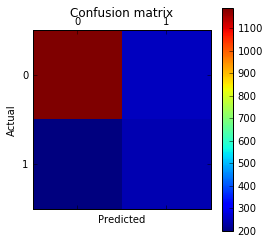

In [37]:
plt.matshow(treecm)
plt.title('Confusion matrix')
plt.colorbar()
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show()

In [38]:
nbclf = naive_bayes.GaussianNB()
nbclf = nbclf.fit(ad_train, ad_target_train)
nbpreds_test = nbclf.predict(ad_test)
print nbpreds_test

[ 0.  0.  1. ...,  0.  1.  0.]


In [39]:
print nbclf.score(ad_train, ad_target_train)

0.720547217426


In [40]:
print nbclf.score(ad_test, ad_target_test)

0.719065321296


In [41]:
from sklearn.lda import LDA

ldclf = LDA()
ldclf = ldclf.fit(ad_train, ad_target_train)
ldpreds_test = ldclf.predict(ad_test)
print ldclf.score(ad_matrix, ad_target)

D:\Anaconda2\lib\site-packages\sklearn\lda.py:4: DeprecationWarning: lda.LDA has been moved to discriminant_analysis.LinearDiscriminantAnalysis in 0.17 and will be removed in 0.19
  "in 0.17 and will be removed in 0.19", DeprecationWarning)


0.807267318317


D:\Anaconda2\lib\site-packages\sklearn\discriminant_analysis.py:387: UserWarning: Variables are collinear.
  warnings.warn("Variables are collinear.")


In [42]:
from sklearn import cross_validation

In [43]:
cv_scores_naive_bayes = cross_validation.cross_val_score(nbclf, ad_matrix, ad_target,cv=10)
cv_scores_naive_bayes 

array([ 0.73,  0.7 ,  0.73,  0.7 ,  0.73,  0.71,  0.71,  0.72,  0.73,  0.71])

In [44]:
cv_scores_tree  = cross_validation.cross_val_score(treeclf, ad_matrix, ad_target,cv=10)
cv_scores_tree

array([ 0.75,  0.74,  0.76,  0.77,  0.76,  0.75,  0.76,  0.77,  0.77,  0.75])

In [45]:
cv_scores_LDA = cross_validation.cross_val_score(ldclf, ad_matrix, ad_target,cv=10)
cv_scores_LDA

array([ 0.81,  0.81,  0.79,  0.82,  0.81,  0.79,  0.8 ,  0.81,  0.82,  0.82])

In [46]:
from sklearn import tree
from StringIO import StringIO

In [47]:
tree.export_graphviz(treeclf,out_file='tree.png', feature_names=
['age',
 'education',
 'hoursperweek',
 'maritalstatus=Married',
 'maritalstatus=Single',
 'race=Amer-',
 'race=Asian',
 'race=Black',
 'race=Hispa',
 'race=White',
 'sex=Femal',
 'sex=Male',
 'workclass=Private',
 'workclass=Public',
 'workclass=Self-emp'])

In [48]:
from IPython.display import Image
Image(filename='tree.png')

In [ ]:
# End of question.